# Promotion Forecasting

In [ ]:
options("scipen"=100, "digits"=4)
if (!require("readr")) install.packages("readr")
library("readr")

This example is taken from the book [Segmentation, Revenue Management
and Pricing
Analytics](https://www.amazon.com/Segmentation-Revenue-Management-Pricing-Analytics/dp/0415898331)
by Tudor Bodea and Mark Ferguson

In [ ]:
url<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vS2Z4rEXAoVmrunY3BLJ5AX-ZH76U8bHpCCOu8mzziWK1X6WnJJiC2RmrWrLffGUxo9dCZD0HW1n15T/pub?gid=1471239210&single=true&output=csv"
df<-read.csv(url)

This is the demand for 26 weeks of staple item like denim jeans. For
this item there were various kinds of promotions. We would like to
understand the effect of these promotions on the demand.

Here is the structure of the dataframe

In [ ]:
str(df)

'data.frame':   26 obs. of  7 variables:
 $ week         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ price        : num  115 135 135 135 135 ...
 $ p114         : int  1 0 0 0 0 1 0 0 0 1 ...
 $ p101         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ specialEvents: int  1 0 0 0 0 1 0 0 0 0 ...
 $ demand       : int  230 71 70 65 60 195 76 51 79 146 ...
 $ X            : chr  "Pres Day" "" "" "" ...

To start there were two different markdown promotions:

-   p114 in the data stands for a 15% off promotion
-   p101 in the data stands for a 25% off promotion

`p114` means the price was set to \$114.75 for the week. This is 15% of
the retail price of \$135. `p101` means the price was set to \$101.25
for the week. This is 25% off.

In addition to that there were special event promotions on holidays.
Some dates had both markdowns and special event promotions together. In
two weeks there were markdown promotions without special events (week 10
and 24):

In [ ]:
df

   week price p114 p101 specialEvents demand           X
1     1 114.8    1    0             1    230    Pres Day
2     2 135.0    0    0             0     71            
3     3 135.0    0    0             0     70            
4     4 135.0    0    0             0     65            
5     5 135.0    0    0             0     60            
6     6 114.8    1    0             1    195      Easter
7     7 135.0    0    0             0     76            
8     8 135.0    0    0             0     51            
9     9 135.0    0    0             0     79            
10   10 114.8    1    0             0    146            
11   11 135.0    0    0             0     69            
12   12 135.0    0    0             0     52            
13   13 135.0    0    0             0     60            
14   14 135.0    0    0             0     50            
15   15 101.2    0    1             1    225    Memorial
16   16 135.0    0    0             0     46            
17   17 135.0    0    0        

Lets take a look at the demand over time for the 26 weeks:

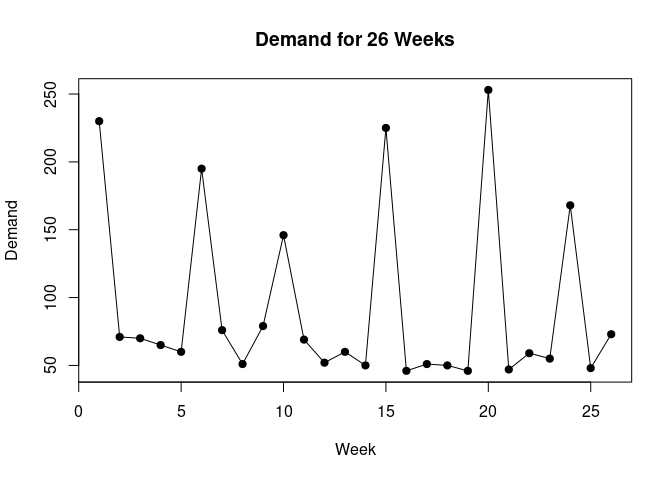

In [ ]:
plot(df$week, df$demand, main="Demand for 26 Weeks", xlab="Week", ylab="Demand", type="l")
points(df$week, df$demand, pch=19)

Clearly you can see the effects of the markdowns and the special event
promotions. Lets run a regression to see if the effects of the different
promotions are significant:

In [ ]:
options("scipen"=100, "digits"=4)
model <- lm(demand~p114+p101+specialEvents, df)
summary(model)


Call:
lm(formula = demand ~ p114 + p101 + specialEvents, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -18.2   -8.9   -0.7   10.8   20.1 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept)      58.90       2.72   21.65 0.00000000000000025 ***
p114             85.60      10.30    8.31 0.00000003120860358 ***
p101            110.60      10.30   10.74 0.00000000032579980 ***
specialEvents    68.75      10.54    6.52 0.00000145812804573 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.2 on 22 degrees of freedom
Multiple R-squared:  0.969, Adjusted R-squared:  0.965 
F-statistic:  232 on 3 and 22 DF,  p-value: <0.0000000000000002

This means that both the markdowns and the special events have a
significant linear relationship with demand.

In particular:

-   baseline demand is 58.90
-   when the 15% markdown is run it accounts for roughly an increase in
    86 units of demand
-   when the 25% markdown is run it accounts for roughly an increase in
    111 units of demand
-   special holiday event promotions account for roughly an increase in
    69 units of demand

What about a demand (or price response) curve?

It is not hard here to see from the model the estmated demand when each
one of the markdowns are in effect by themselves.

For 15% markdown we have:

$$ 
\text{Demand} = 58.90 + 85.60 = 144.50 
$$

For the 25% we have:

$$ 
\text{Demand} = 58.90 + 110.60 = 169.50 
$$

So we can use this demand and price data to think about a price response
curve:

In [ ]:
price <- c(135, 114.75, 101.25)
demand <- c(58.9, 144.5, 169.50)

Here is the plot of the demand and price:

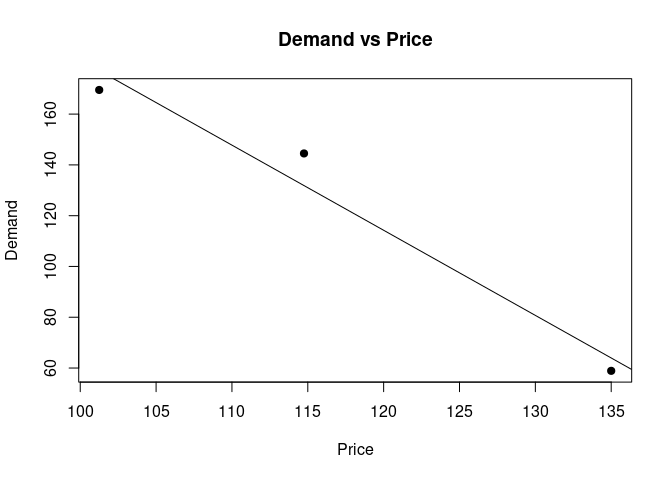

In [ ]:
plot(price, demand, main="Demand vs Price", xlab="Price", ylab="Demand", pch=19)
model2 <- lm(demand~price)
abline(model2)

Now lets see model summary:

In [ ]:
summary(model2)


Call:
lm(formula = demand ~ price)

Residuals:
    1     2     3 
-5.06 12.66 -7.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   516.49      76.54    6.75    0.094 .
price          -3.35       0.65   -5.16    0.122  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.6 on 1 degrees of freedom
Multiple R-squared:  0.964, Adjusted R-squared:  0.928 
F-statistic: 26.6 on 1 and 1 DF,  p-value: 0.122

The p-value for the price is 0.122, not particularly surpising given
that we have just a small amount of data for this demand curve.